In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
df=pd.read_csv("D:/Project 1/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [72]:
pd.set_option('display.max_columns', 21)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [74]:
df.shape

(9551, 21)

Check for missing values in each column and handle them accordingly.

In [75]:
Missing_values=df.isnull().sum()
Missing_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [76]:
df = df.dropna(subset=['Cuisines'])

Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [77]:
# Data types as category
category_col=['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']
df[category_col]=df[category_col].astype('category')



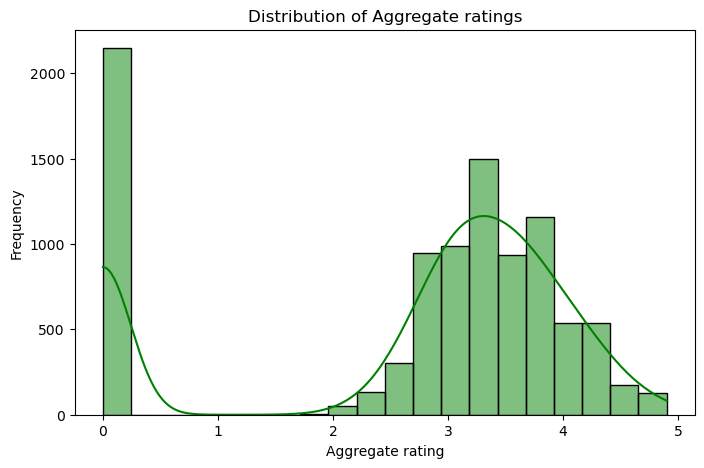

C:\Users\91701\AppData\Local\Temp\ipykernel_17804\4107212421.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_count.index,y=ratings_count.values,color='green',palette='viridis')


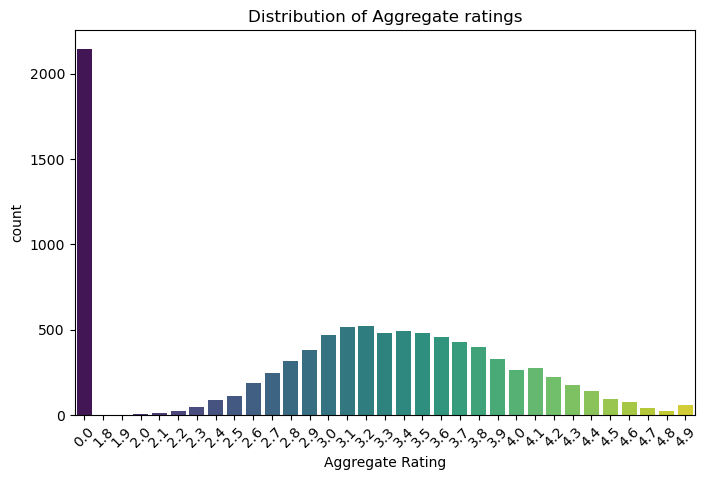

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'],bins=20,kde=True,color='green')
plt.title('Distribution of Aggregate ratings')
plt.ylabel('Frequency')
plt.show()

ratings_count=df['Aggregate rating'].value_counts().sort_index()

#Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=ratings_count.index,y=ratings_count.values,color='green',palette='viridis')
plt.title('Distribution of Aggregate ratings')
plt.xlabel("Aggregate Rating")
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()



**Task:Descriptive Analysis**

Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns

In [79]:
#Price range
print(f'The averge price ratings are {df['Price range'].mean()}')
print(f'The median price ratings are {df['Price range'].median()}')
print(f'The most common price ratings are {df['Price range'].mode()}')
print(f'The standard deviation of price ratings are {df['Price range'].std()}')



The averge price ratings are 1.8049675120519808
The median price ratings are 2.0
The most common price ratings are 0    1
Name: Price range, dtype: int64
The standard deviation of price ratings are 0.9055630824943393


**Conclusion for Price Ratings Analysis**

The average price rating is 1.80, meaning most restaurants are in the lower to mid-price range.

The median price rating is 2.0, indicating that at least half of the restaurants have a price rating of 2 or below.

The most common price ratings are 0 and 1, suggesting that many restaurants fall into the cheapest price categories.

The standard deviation is 0.91, which shows low variation in price ratings. This means most restaurants have similar pricing levels, with few extremely expensive or cheap outliers.

In [80]:
print(f'The averge Aggregate rating are {df['Aggregate rating'].mean()}')
print(f'The median Aggregate rating are {df['Aggregate rating'].median()}')
print(f'The most common Aggregate rating are {df['Aggregate rating'].mode()}')
print(f'The standard deviation of Aggregate rating are {df['Aggregate rating'].std()}')



The averge Aggregate rating are 2.665237895619367
The median Aggregate rating are 3.2
The most common Aggregate rating are 0    0.0
Name: Aggregate rating, dtype: float64
The standard deviation of Aggregate rating are 1.516587508208202


**Conclusion for Aggregate Ratings Analysis**
*The average aggregate rating is 2.67, which is relatively low, suggesting that restaurants generally receive moderate to poor reviews.
*The median aggregate rating is 3.2, indicating that at least half of the restaurants have ratings above 3.2, showing a slight positive skew.
*The most common rating is 0.0, meaning a significant number of restaurants have either not been rated or received extremely low ratings.
*The standard deviation is 1.52, which shows moderate variation in ratings. This means there is a mix of highly rated and poorly rated restaurants.

Explore the distribution of categorical variables like "Country Code," "City," and"Cuisines."

C:\Users\91701\AppData\Local\Temp\ipykernel_17804\134780444.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_code.index,y=country_code.values,palette='viridis')


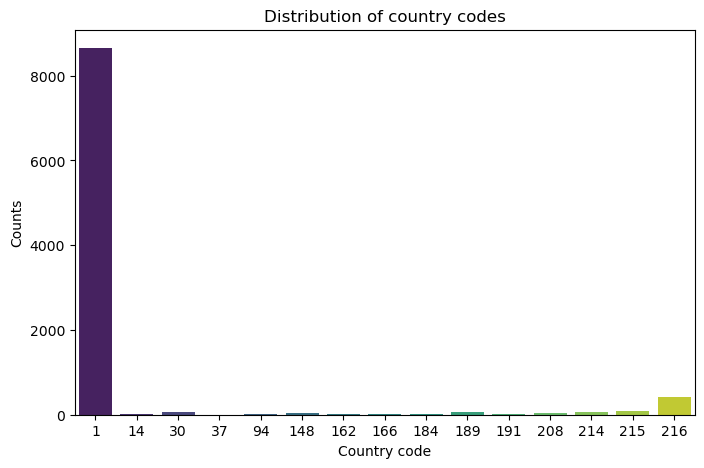

C:\Users\91701\AppData\Local\Temp\ipykernel_17804\134780444.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city.index,y=city.values,palette='coolwarm')


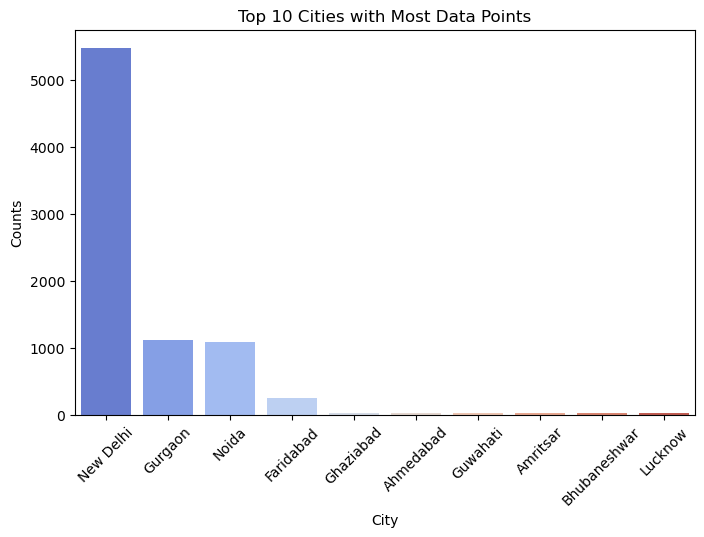

C:\Users\91701\AppData\Local\Temp\ipykernel_17804\134780444.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index,y=top_cuisines.values,palette='viridis')


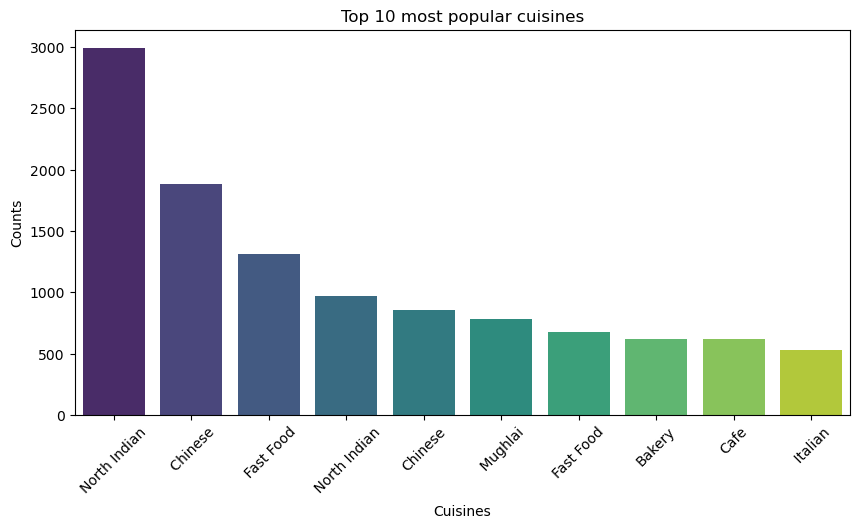

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of country codes
country_code=df['Country Code'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=country_code.index,y=country_code.values,palette='viridis')
plt.title('Distribution of country codes')
plt.xlabel('Country code')
plt.ylabel('Counts')
plt.show()

#Top 10 most popular city
city=df['City'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=city.index,y=city.values,palette='coolwarm')
plt.title('Top 10 Cities with Most Data Points')
plt.xlabel('City')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

#Top 10 most popular cuisines
top_cuisines=df['Cuisines'].str.split(",").explode().value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.index,y=top_cuisines.values,palette='viridis')
plt.title('Top 10 most popular cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()




**Task:Geospatial Analysis**



Analyze the distribution of restaurants across different cities or countries.
Determine if there is any correlation between the restaurant's location and its rating.

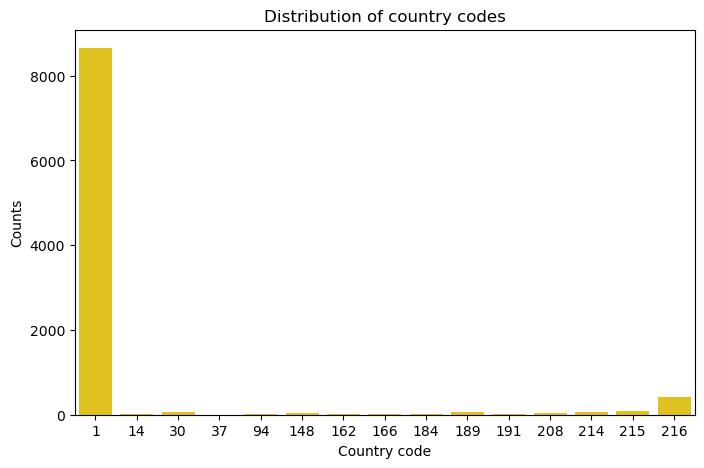

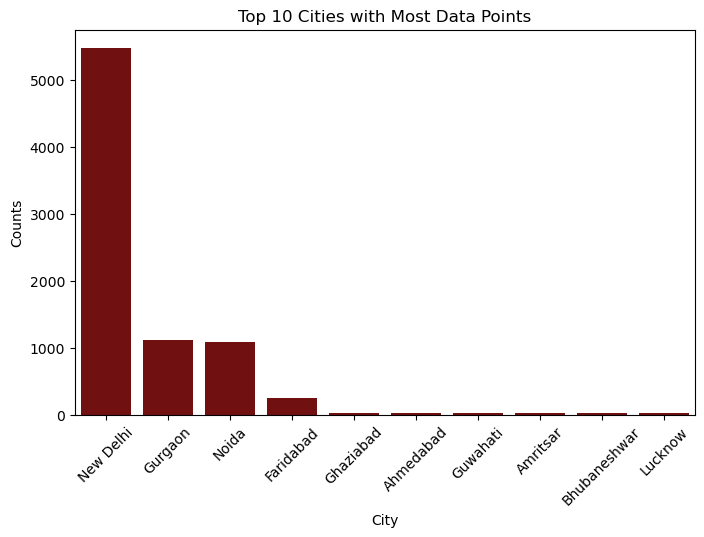

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#country codes
country_code=df['Country Code'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=country_code.index,y=country_code.values,color='gold')
plt.title('Distribution of country codes')
plt.xlabel('Country code')
plt.ylabel('Counts')
plt.show()

#Top 10 most popular city
city=df['City'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=city.index,y=city.values,color='maroon')
plt.title('Top 10 Cities with Most Data Points')
plt.xlabel('City')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Correlation between Country and Rating:
                  Country Code  Aggregate rating
Country Code          1.000000          0.281295
Aggregate rating      0.281295          1.000000


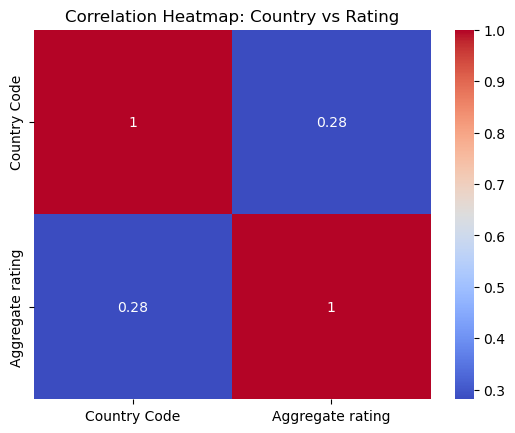

In [83]:
correlation=df[['Country Code','Aggregate rating']].corr()
print("Correlation between Country and Rating:")
print(correlation)
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap: Country vs Rating")
plt.show()

Conclusion:The correlation between Country Code and Aggregate Rating is 0.281, which indicates a weak positive correlation.

**Task: Table Booking and Online Delivery**



Determine the percentage of restaurants that offer table booking and online delivery.

In [84]:
#Total number of restaurants
Total_restaurants=df['Restaurant ID'].nunique()
Total_restaurants

# counts of Table booking and online delivery
Table_booking_count=df['Has Table booking'].value_counts()
Online_delivery_count=df['Has Online delivery'].value_counts()

#percentage of restaurants that offer table booking and Online delivery
print(f'percentage of restaurants that offer table booking is {(Table_booking_count['Yes']/Total_restaurants)*100:.2f}%')
print(f'percentage of restaurants that offer Online delivery is {(Online_delivery_count['Yes']/Total_restaurants)*100:.2f}%')




percentage of restaurants that offer table booking is 12.14%
percentage of restaurants that offer Online delivery is 25.69%


Compare the average ratings of restaurants with table booking and those without.

In [85]:
Average_rating=df.groupby('Has Table booking')['Aggregate rating'].mean()
print(f'Average_rating of restaurants with table booking is {Average_rating['Yes']:.2f}%')
print(f'Average_rating of restaurants without table booking is {Average_rating['No']:.2f}%')

Average_rating of restaurants with table booking is 3.44%
Average_rating of restaurants without table booking is 2.56%


C:\Users\91701\AppData\Local\Temp\ipykernel_17804\3855236186.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Average_rating=df.groupby('Has Table booking')['Aggregate rating'].mean()


Analyze the availability of online delivery among restaurants with different price ranges.


In [86]:
df.groupby('Price range')['Has Online delivery'].value_counts()


Price range  Has Online delivery
1            No                     3737
             Yes                     701
2            No                     1827
             Yes                    1286
3            No                      994
             Yes                     411
4            No                      533
             Yes                      53
Name: count, dtype: int64

In [87]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229



**Task: Price Range Analysis**

Determine the most common price range among all the restaurants.

In [88]:
price_range=df['Price range'].value_counts()
print(f'The most common {price_range.head(1)}')

The most common Price range
1    4438
Name: count, dtype: int64


Calculate the average rating for each price range.

In [89]:
Average_rating=df.groupby('Price range')['Aggregate rating'].mean()
Average_rating

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64

Identify the color that represents the highest average rating among different price ranges.

In [90]:
Average_rate=df.groupby('Rating color')['Aggregate rating'].mean()
Highest_avg_color=Average_rate.idxmax()
Highest_avg_ratings=Average_rate.max()
print(f"The color with the highest average rating is {Highest_avg_color} with a rating of {Highest_avg_ratings:.2f}.")



The color with the highest average rating is Dark Green with a rating of 4.66.


**Task: Feature Engineering**

Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [91]:
df['length name']=df['Restaurant Name'].apply(len)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,length name
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,16
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,16


Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.


In [92]:
dummy=pd.get_dummies(df,columns=['Has Online delivery'],drop_first=True)
pd.set_option('display.max_columns',23)
dummy.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,length name,Has Online delivery_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,16,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,16,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,22,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,4,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,11,False


In [93]:
dummy['Has Online delivery_Yes']=dummy['Has Online delivery_Yes'].astype(int)
dummy.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,length name,Has Online delivery_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,16,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,16,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,22,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,4,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,11,0


**Task: Predictive Modeling**

Build a regression model to predict the aggregate rating of a restaurant based on available features.
Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [94]:
dummy.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,length name,Has Online delivery_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,16,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,16,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,22,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,4,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,11,0


In [95]:
data=dummy.drop(['Average Cost for two','Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Currency','length name'],axis=1)
data.head()

,Has Table booking,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Online delivery_Yes
0,Yes,No,No,3,4.8,Dark Green,Excellent,314,0
1,Yes,No,No,3,4.5,Dark Green,Excellent,591,0
2,Yes,No,No,4,4.4,Green,Very Good,270,0
3,No,No,No,4,4.9,Dark Green,Excellent,365,0
4,Yes,No,No,4,4.8,Dark Green,Excellent,229,0


In [96]:
from sklearn.preprocessing import LabelEncoder
le_color=LabelEncoder()
le_text=LabelEncoder()
data['Rating color']=le_color.fit_transform(data['Rating color'])
data['Rating text']=le_text.fit_transform(data['Rating text'])

In [97]:
Final_data=pd.get_dummies(data,columns=['Has Table booking','Is delivering now','Switch to order menu'],drop_first=True)
Final_data.head()

,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Online delivery_Yes,Has Table booking_Yes,Is delivering now_Yes
0,3,4.8,0,1,314,0,True,False
1,3,4.5,0,1,591,0,True,False
2,4,4.4,1,5,270,0,True,False
3,4,4.9,0,1,365,0,False,False
4,4,4.8,0,1,229,0,True,False


In [98]:
Final_data[['Has Table booking_Yes','Is delivering now_Yes']]=Final_data[['Has Table booking_Yes','Is delivering now_Yes']].astype(int)
Final_data

,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Online delivery_Yes,Has Table booking_Yes,Is delivering now_Yes
0,3,4.8,0,1,314,0,1,0
1,3,4.5,0,1,591,0,1,0
2,4,4.4,1,5,270,0,1,0
3,4,4.9,0,1,365,0,0,0
4,4,4.8,0,1,229,0,1,0
...,...,...,...,...,...,...,...,...
9546,3,4.1,1,5,788,0,0,0
9547,3,4.2,1,5,1034,0,0,0
9548,4,3.7,5,2,661,0,0,0
9549,4,4.0,1,5,901,0,0,0


In [99]:
X=Final_data.drop(['Aggregate rating'],axis=1)
y=Final_data["Aggregate rating"]

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)


In [101]:
x_train

,Price range,Rating color,Rating text,Votes,Has Online delivery_Yes,Has Table booking_Yes,Is delivering now_Yes
1980,2,2,0,48,0,0,0
8743,1,4,3,0,0,0,0
8696,1,4,3,1,0,0,0
1785,1,4,3,0,0,0,0
4294,1,2,0,85,0,0,0
...,...,...,...,...,...,...,...
7848,2,2,0,430,1,1,0
3612,1,2,0,4,0,0,0
5968,2,2,0,6,0,0,0
5435,4,5,2,498,1,1,0


In [102]:
x_train.shape

(6679, 7)

In [103]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [104]:
model.score(x_test,y_test)

0.4119733434742099

In [105]:
model.score(x_train,y_train)

0.3859651148844493

In [109]:
from sklearn.linear_model import Lasso
la=Lasso(alpha=50, max_iter=100, tol=0.1 )
la.fit(x_train,y_train)
la.score(x_test,y_test)

0.09463077436506895

In [110]:
from sklearn.linear_model import Ridge
ra=Ridge(alpha=50, max_iter=100, tol=0.1 )
ra.fit(x_train,y_train)
ra.score(x_test,y_test)

0.41210610580900675

In [ ]:
y_predict=model.predict(x_test)
y_predict

array([3.38879683, 2.76110033, 3.6107013 , ..., 3.14723413, 3.12099396,
       1.42448898])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.4119733434742099

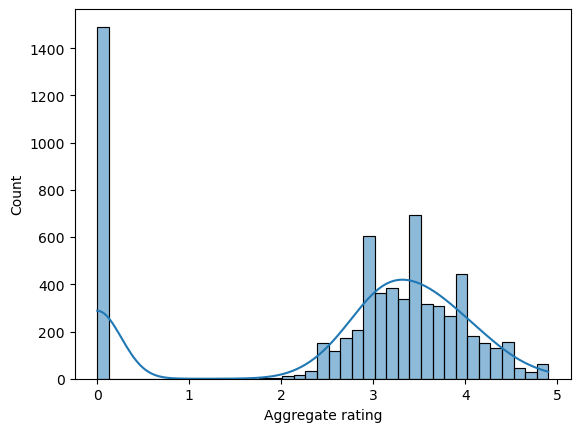

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_train, kde=True)
plt.show()

Experiment with different algorithms (e.g.decision trees, randomforest) and compare their performance.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ml=DecisionTreeRegressor()

In [ ]:
ml.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
ml.score(x_test,y_test)

0.9811447181159881

In [ ]:
y_pred=ml.predict(x_test)
y_pred

array([3.7 , 3.55, 4.5 , ..., 3.5 , 4.4 , 0.  ])

In [ ]:
r2_score(y_test,y_pred)

0.9811447181159881

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor(n_estimators=40)
rm.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40)

In [ ]:
rm.score(x_test,y_test)

0.9842248690496972

In [ ]:
y_predi=rm.predict(x_test)
y_predi

array([3.725 , 3.65  , 4.545 , ..., 3.6075, 4.205 , 0.    ])

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)
print("MAE:", mae)


MAE: 0.9780179340684175


In [ ]:
r2_score(y_test,y_predi)

0.9842248690496972

**Task: Customer Preference Analysis**


Analyze the relationship between the type of cuisine and the restaurant's rating.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,length name
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,16
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,16
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,22
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,4
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,11


In [ ]:
le_Cuisines=LabelEncoder()
df['Cuisines']=le_Cuisines.fit_transform(df['Cuisines'])

In [ ]:
d=df[['Cuisines','Aggregate rating']]
d

,Cuisines,Aggregate rating
0,920,4.8
1,1111,4.5
2,1671,4.4
3,1126,4.9
4,1122,4.8
...,...,...
9546,1813,4.1
9547,1824,4.2
9548,1110,3.7
9549,1657,4.0


Correlation between Cuisines and Rating:
                  Cuisines  Aggregate rating
Cuisines          1.000000         -0.080832
Aggregate rating -0.080832          1.000000


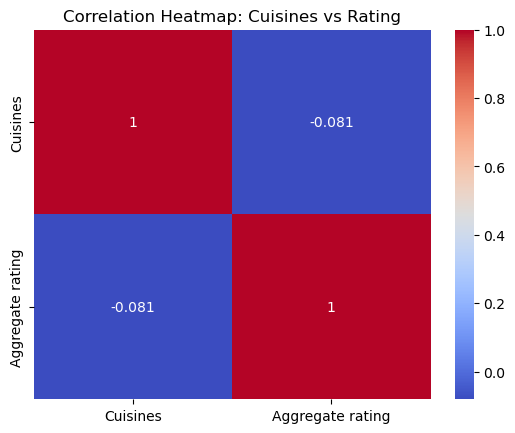

In [ ]:
correl=d[['Cuisines','Aggregate rating']].corr()
print("Correlation between Cuisines and Rating:")
print(correl)
sns.heatmap(correl,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap: Cuisines vs Rating")
plt.show()

There is no significant correlation between cuisines and aggregate rating.

Identify the most popular cuisines among customers based on the number of votes.

In [ ]:
Cuisines_votes=dummy[['Cuisines','Votes']].copy()
Cuisines_votes['Cuisines']=Cuisines_votes['Cuisines'].str.split(',')
Cuisines_votes=Cuisines_votes.explode('Cuisines').reset_index(drop=True)
most_popular_cuisine=Cuisines_votes.groupby('Cuisines')['Votes'].sum().idxmax()
print(' most popular cuisines is',most_popular_cuisine)

 most popular cuisines is North Indian


Determine if there are any specific cuisines that tend to receive higher ratings.


In [ ]:
higher_ratings_cuisines=dummy.groupby('Cuisines')['Aggregate rating'].sum().idxmax()
print('Higher ratings cuisines is',higher_ratings_cuisines)


Higher ratings cuisines is North Indian


**Task: Data Visualization**

Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

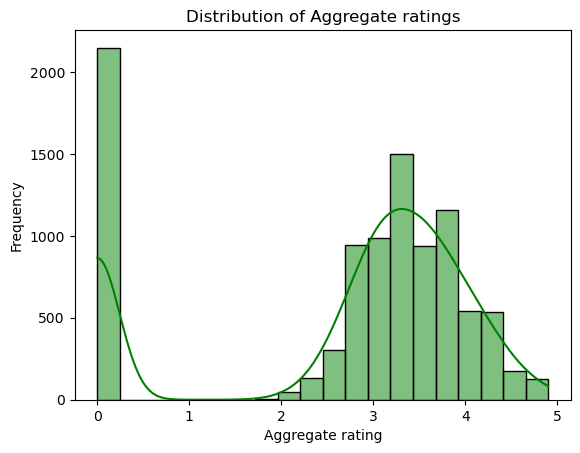

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram
# plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'],bins=20,kde=True,color='green')
plt.title('Distribution of Aggregate ratings')
plt.ylabel('Frequency')
plt.show()





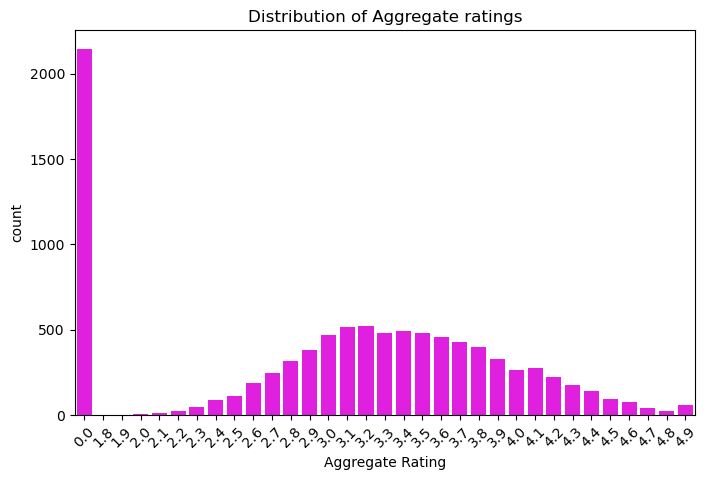

In [ ]:
#Bar plot
ratings_count=df['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=ratings_count.index,y=ratings_count.values,color='magenta')
plt.title('Distribution of Aggregate ratings')
plt.xlabel("Aggregate Rating")
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Compare the average ratings of different cuisines or cities using appropriate visualizations.

In [ ]:
d=dummy[['Cuisines','Aggregate rating']].copy()
d['Cuisines']=d['Cuisines'].str.split(',')
d=d.explode('Cuisines').reset_index(drop=True)
d

,Cuisines,Aggregate rating
0,French,4.8
1,Japanese,4.8
2,Desserts,4.8
3,Japanese,4.5
4,Seafood,4.4
...,...,...
19705,Cafe,4.2
19706,Italian,3.7
19707,World Cuisine,3.7
19708,Restaurant Cafe,4.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'World Cuisine'),
  Text(1, 0, 'Western'),
  Text(2, 0, 'Vietnamese'),
  Text(3, 0, 'Turkish Pizza'),
  Text(4, 0, 'Turkish'),
  Text(5, 0, 'Tibetan'),
  Text(6, 0, 'Thai'),
  Text(7, 0, 'Tex-Mex'),
  Text(8, 0, 'Tea'),
  Text(9, 0, 'Tapas')])

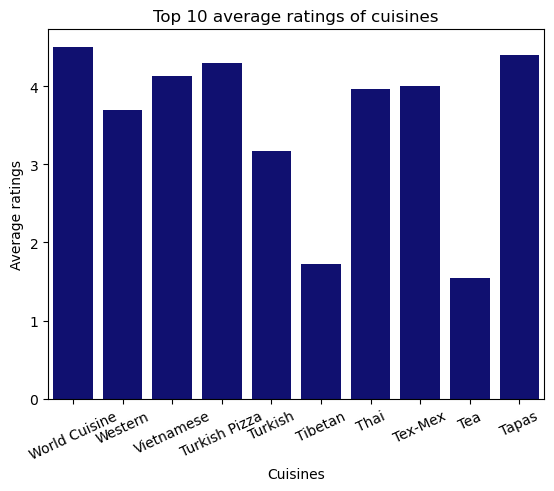

In [ ]:
Average_ratings_cuisines=d.groupby('Cuisines')['Aggregate rating'].mean().sort_index(ascending=False)

plt.title("Top 10 average ratings of cuisines")
plt.xlabel('Cuisines')
plt.ylabel('Average ratings')
sns.barplot(x=Average_ratings_cuisines.index[:10],y=Average_ratings_cuisines.values[:10],color='navy')
plt.xticks(rotation=25)


Visualize the relationship between various features and the target variable to gain insights.

In [ ]:
Final_data

,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Online delivery_Yes,Has Table booking_Yes,Is delivering now_Yes
0,3,4.8,0,1,314,0,1,0
1,3,4.5,0,1,591,0,1,0
2,4,4.4,1,5,270,0,1,0
3,4,4.9,0,1,365,0,0,0
4,4,4.8,0,1,229,0,1,0
...,...,...,...,...,...,...,...,...
9546,3,4.1,1,5,788,0,0,0
9547,3,4.2,1,5,1034,0,0,0
9548,4,3.7,5,2,661,0,0,0
9549,4,4.0,1,5,901,0,0,0


Correlation Heatmap

<Axes: >

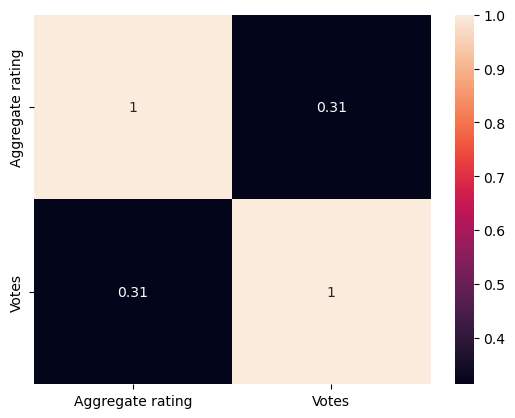

In [ ]:
corr_rate_votes=Final_data[['Aggregate rating','Votes']].corr()
sns.heatmap(corr_rate_votes,annot=True)

**Conclusions :** This is a weak positive correlation, means the number of votes increases, the aggregate rating slightly tends to increase, but the relationship is not very strong.

Box plot

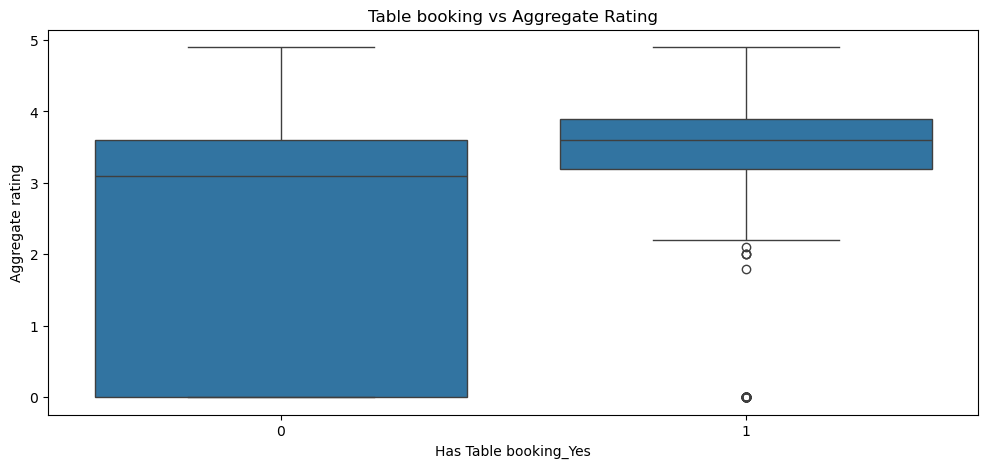

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=Final_data,x='Has Table booking_Yes', y='Aggregate rating')
plt.title("Table booking vs Aggregate Rating")
plt.show()

**Conclusions :** Offering a table booking option may be correlated with higher customer satisfaction and better ratings.

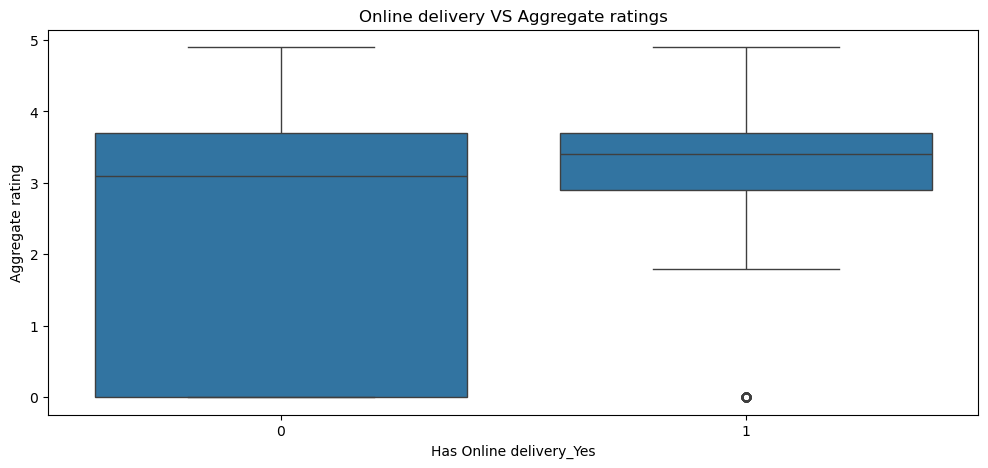

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=Final_data,x='Has Online delivery_Yes',y='Aggregate rating')
plt.title('Online delivery VS Aggregate ratings')
plt.show()

**Conclusions :** Offering a Online delivery option may be correlated with higher customer satisfaction and better ratings.

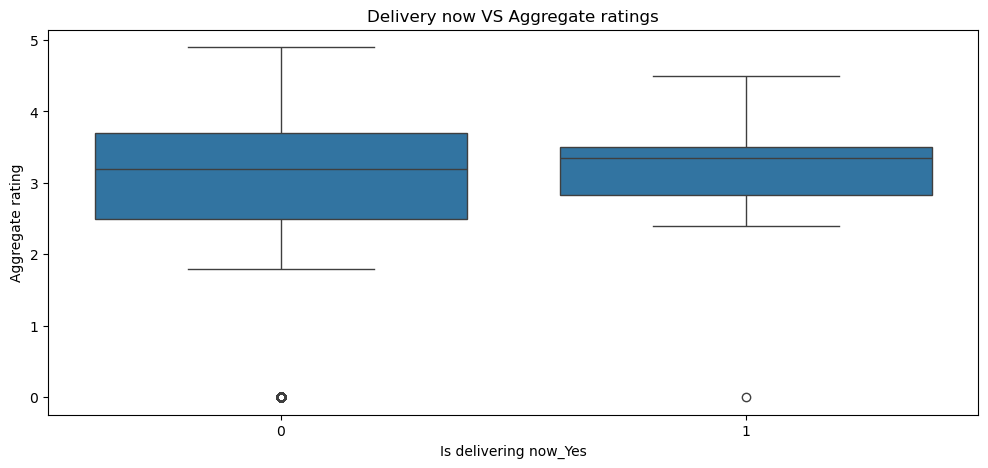

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=Final_data,x='Is delivering now_Yes',y='Aggregate rating')
plt.title('Delivery now VS Aggregate ratings')
plt.show()

**Conclusions :** Offering delivery does not necessarily result in higher ratings. In fact, restaurants that do not offer delivery tend to have slightly higher ratings on average.

Scatter plot

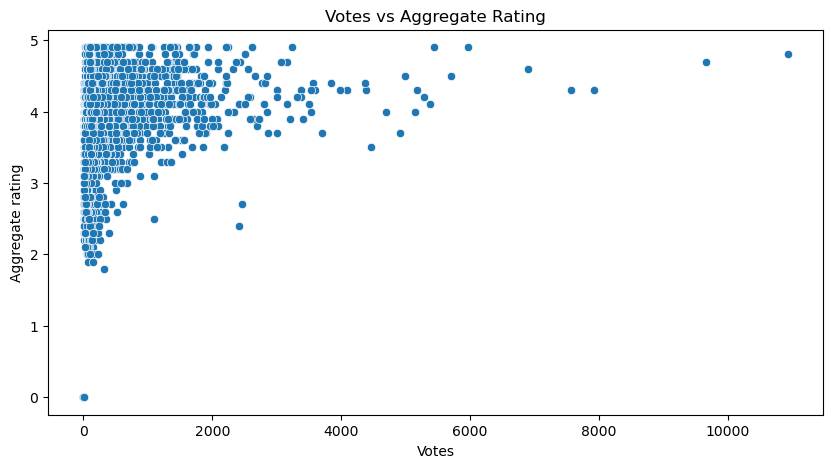

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=Final_data)
plt.title("Votes vs Aggregate Rating")
plt.show()

Count plot

C:\Users\91701\AppData\Local\Temp\ipykernel_17804\2406738826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=Final_data, palette="pastel")


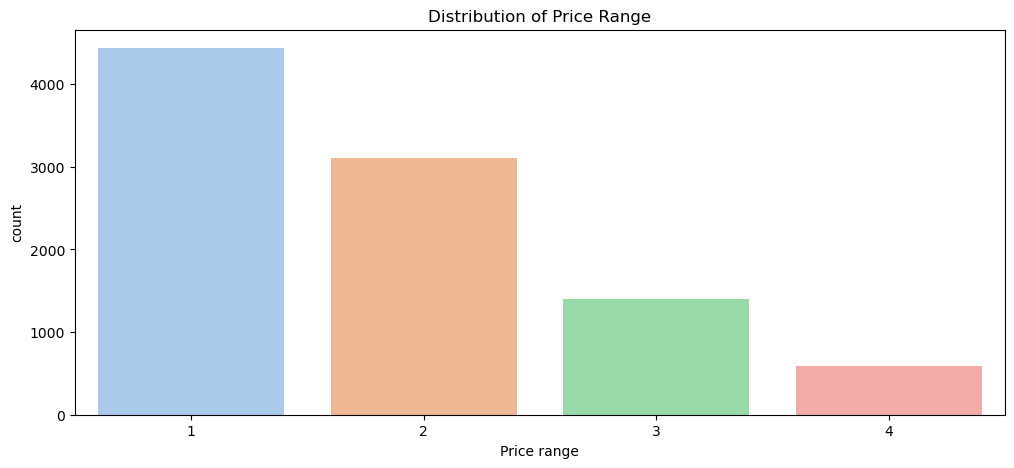

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Price range', data=Final_data, palette="pastel")
plt.title("Distribution of Price Range")
plt.show()

**Conclusions :** The majority of restaurants fall into Price Range 1 (least expensive), indicating that budget-friendly restaurants are the most common.